<a href="https://colab.research.google.com/github/praharaadhi/i-want-to-learn-pytorch/blob/main/I_want_to_learn_Pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to load and visualize public dataset
## Lets try with FashionMNIST and CIFAR10

Check my Pytorch version.

In [ ]:
import torch
print(torch.__version__)

2.1.0+cu121


Pytorch contains three great modules:
*   TorchText
*   TorchVision
*   TorchAudio

I will focus learning on TorchVision because my field study is Computer Vision.






In [ ]:
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

Load FashionMNIST dataset.

In [ ]:
# download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 13716729.83it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 232621.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4308772.24it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6309841.32it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Check the data dimension.

In [ ]:

# check the data dimension.
print("Training data:", training_data.data.shape)
print("Training labels:", training_data.targets.shape)
print("Test data:", test_data.data.shape)
print("Test labels:", test_data.targets.shape)

Training data: torch.Size([60000, 28, 28])
Training labels: torch.Size([60000])
Test data: torch.Size([10000, 28, 28])
Test labels: torch.Size([10000])


The dataset will be stored into mini-batch.

In [ ]:
from torch.utils.data import DataLoader

# here I wish to put large number but in reality...
batch_size = 64

# create data loaders that read batch of shuffled data.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Check the batch dimension.

In [ ]:
# get the first batch.
for X, y in test_dataloader:
    # check the data dimension.
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


Get the class name.

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

Visualize the dataset.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


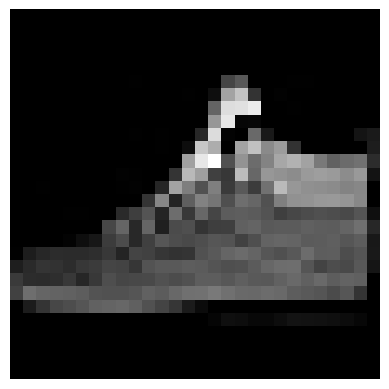

Label: 7-Sneaker


In [ ]:
# display image and label on the first batch.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# get the first image on batch and show it
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()
print(f"Label: {label}-{labels_map.get(label.item())}")

Load CIFAR10 dataset.

In [ ]:
# download training data from open datasets.
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# download test data from open datasets.
test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 170498071/170498071 [00:02<00:00, 62054594.07it/s]


Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified


Check the data dimension.

In [ ]:
# check the data dimension.
print("Training data:", training_data.data.shape)
print("Training labels:", len(training_data.targets))
print("Test data:", test_data.data.shape)
print("Test labels:", len(test_data.targets))

Training data: (50000, 32, 32, 3)
Training labels: 50000
Test data: (10000, 32, 32, 3)
Test labels: 10000


The dataset will be stored into mini-batch.

In [ ]:
from torch.utils.data import DataLoader

# here I wish to put large number but in reality...
batch_size = 64

# create data loaders that read batch of shuffled data.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

Check the batch dimension.

In [ ]:
# get the first batch.
for X, y in test_dataloader:
    # check the data dimension.
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


Get the class name.

In [ ]:
labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

Visualize the dataset.

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


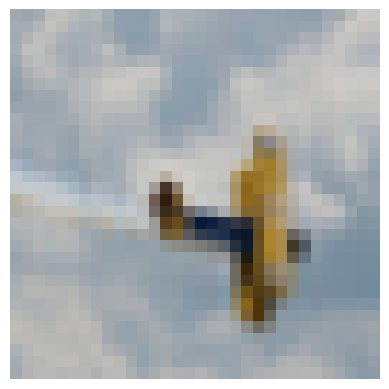

Label: 0-airplane


In [ ]:
# display image and label on the first batch.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

# get the first image on batch and show it
img = train_features[0].permute(1, 2, 0)
label = train_labels[0]
plt.imshow(img)
plt.axis("off")
plt.show()
print(f"Label: {label}-{labels_map.get(label.item())}")